In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Örnek veri seti: Market sepeti verileri
data = {'milk': [1, 0, 1, 1, 0, 1],
        'bread': [1, 1, 0, 1, 1, 1],
        'butter': [0, 1, 1, 1, 1, 0],
        'eggs': [1, 1, 0, 1, 1, 1]}

# Veriyi DataFrame formatına dönüştürelim
df = pd.DataFrame(data)

# Apriori algoritması ile sık öğe kümelerini belirleme
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Eski sürüm için association_rules fonksiyonunda num_itemsets ekleyelim
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets),
                          metric="confidence", min_threshold=0.7)

# Sık öğeleri ve birliktelik kurallarını gösterelim
print("Sık Öğeler:")
print(frequent_itemsets)

print("\nBirliktelik Kuralları:")
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Sık Öğeler:
     support               itemsets
0   0.666667                 (milk)
1   0.833333                (bread)
2   0.666667               (butter)
3   0.833333                 (eggs)
4   0.500000          (milk, bread)
5   0.500000           (eggs, milk)
6   0.500000        (butter, bread)
7   0.833333          (eggs, bread)
8   0.500000         (butter, eggs)
9   0.500000    (eggs, milk, bread)
10  0.500000  (butter, eggs, bread)

Birliktelik Kuralları:
        antecedents    consequents  antecedent support  consequent support  \
0            (milk)        (bread)            0.666667            0.833333   
1            (milk)         (eggs)            0.666667            0.833333   
2          (butter)        (bread)            0.666667            0.833333   
3            (eggs)        (bread)            0.833333            0.833333   
4           (bread)         (eggs)            0.833333            0.833333   
5          (butter)         (eggs)            0.666667          

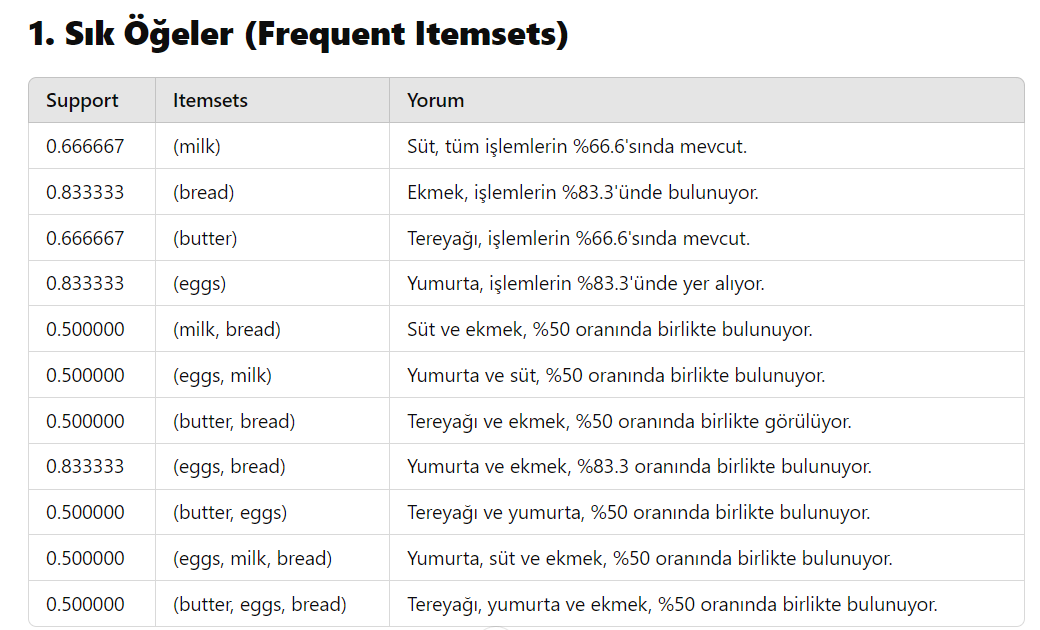


Yorum:

bread (ekmek) ve eggs (yumurta) en sık görülen öğelerdir ve %83.3 gibi yüksek bir destek oranına sahiptir.

Çift kombinasyonlarda (milk, bread) ve (butter, eggs) gibi öğeler %50 oranında birlikte bulunuyor.

Üçlü kombinasyonlardan (eggs, milk, bread) ve (butter, eggs, bread) de %50 sıklıkla gözlenmiştir.

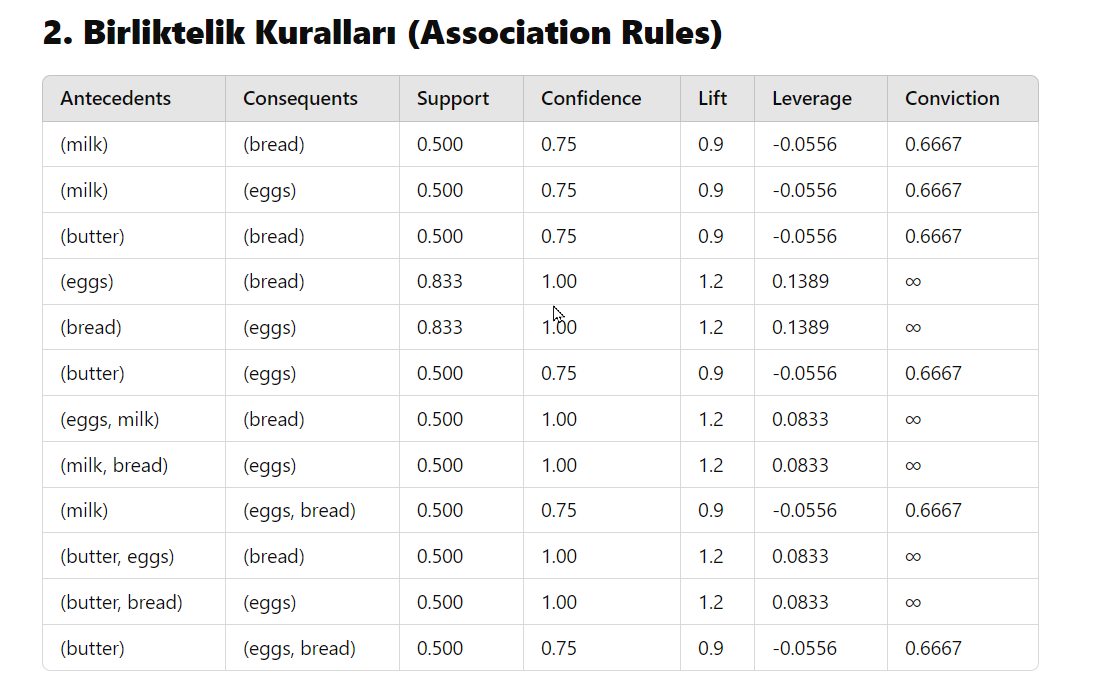


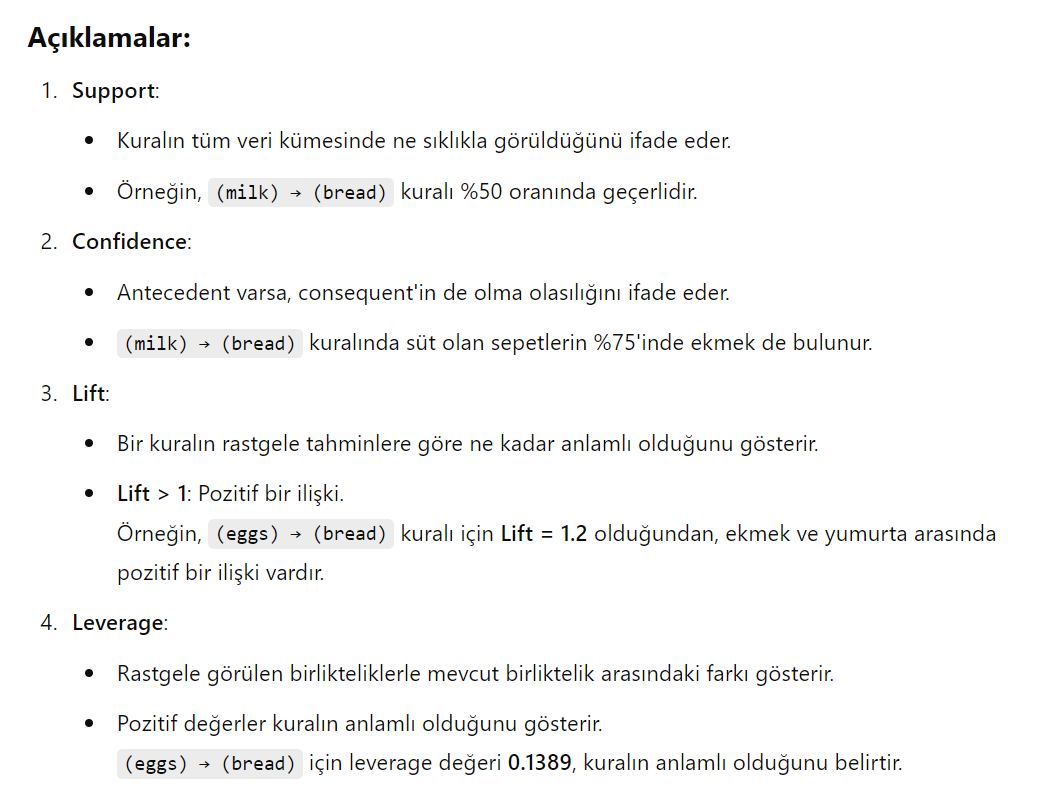


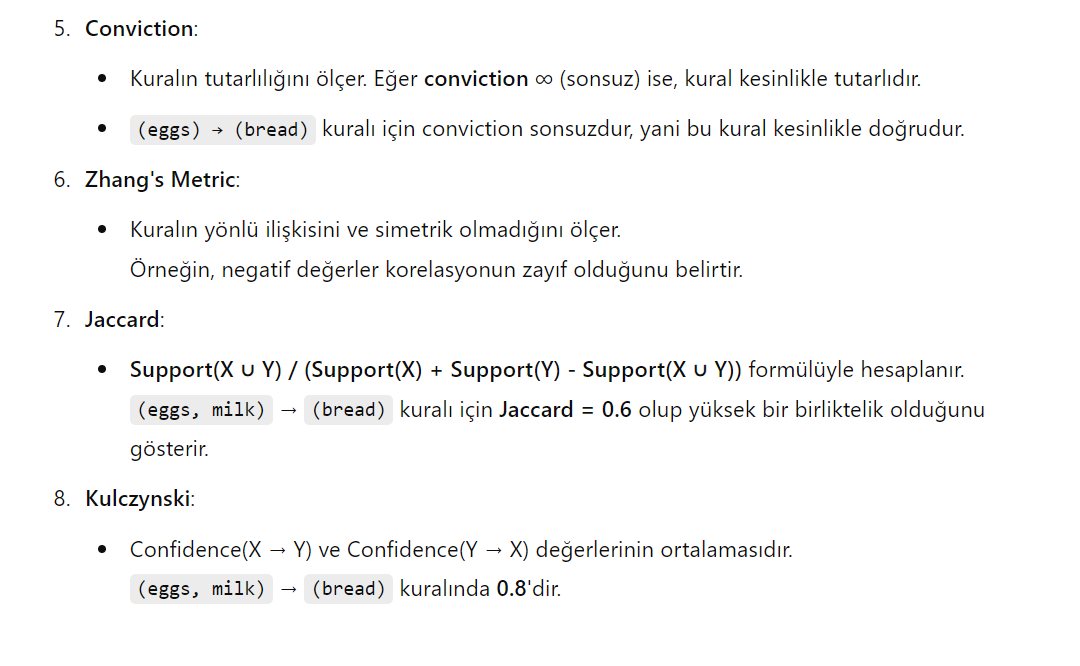

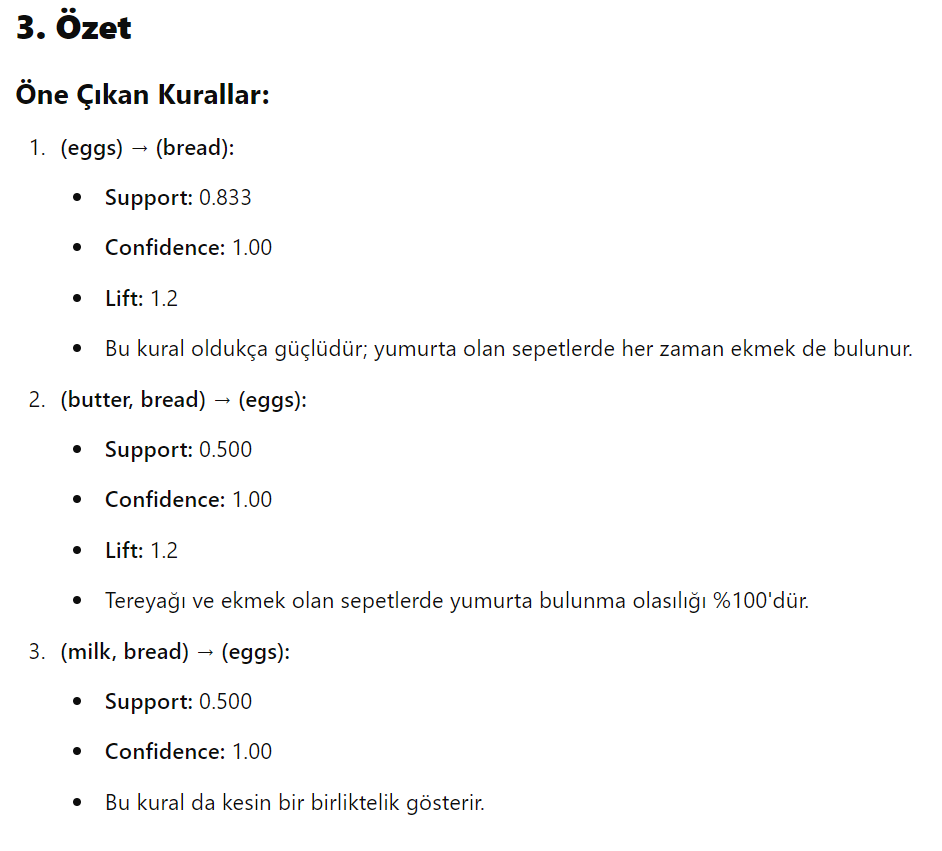

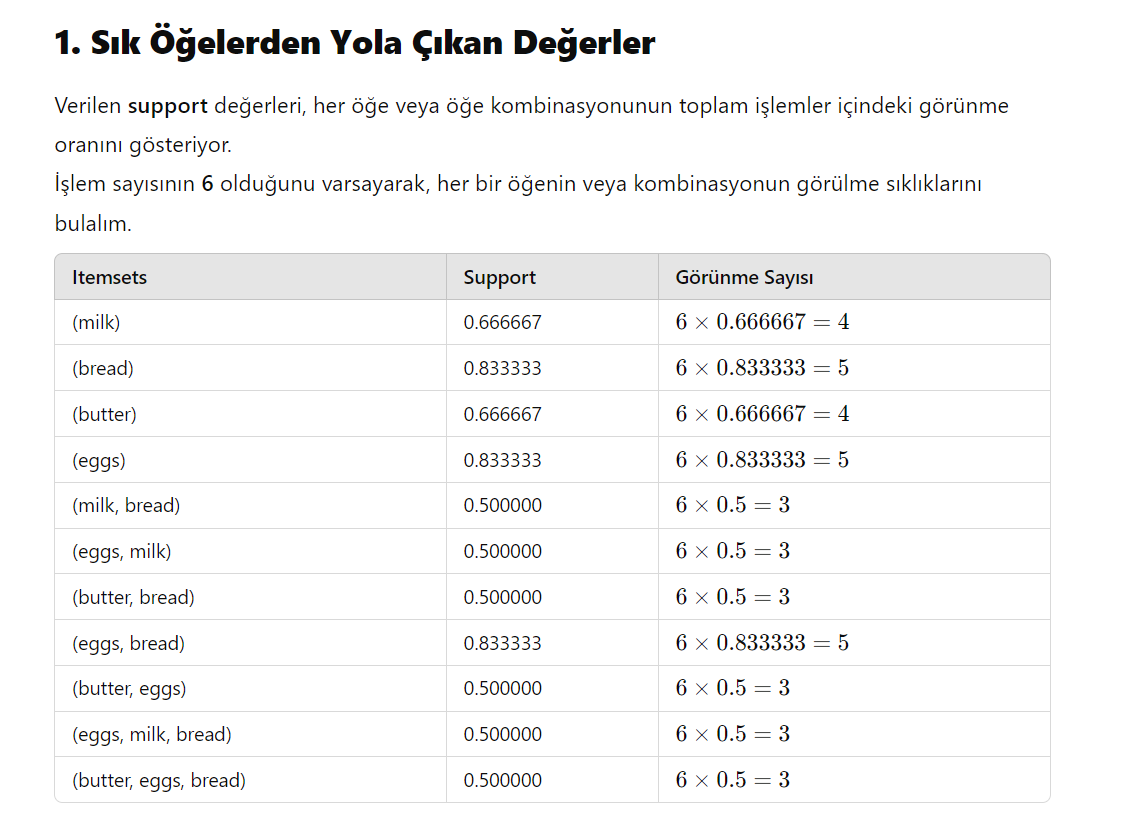

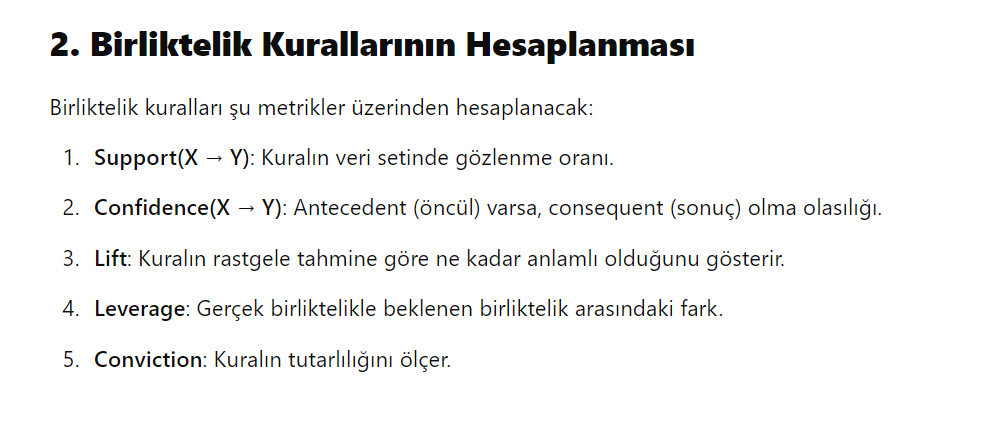

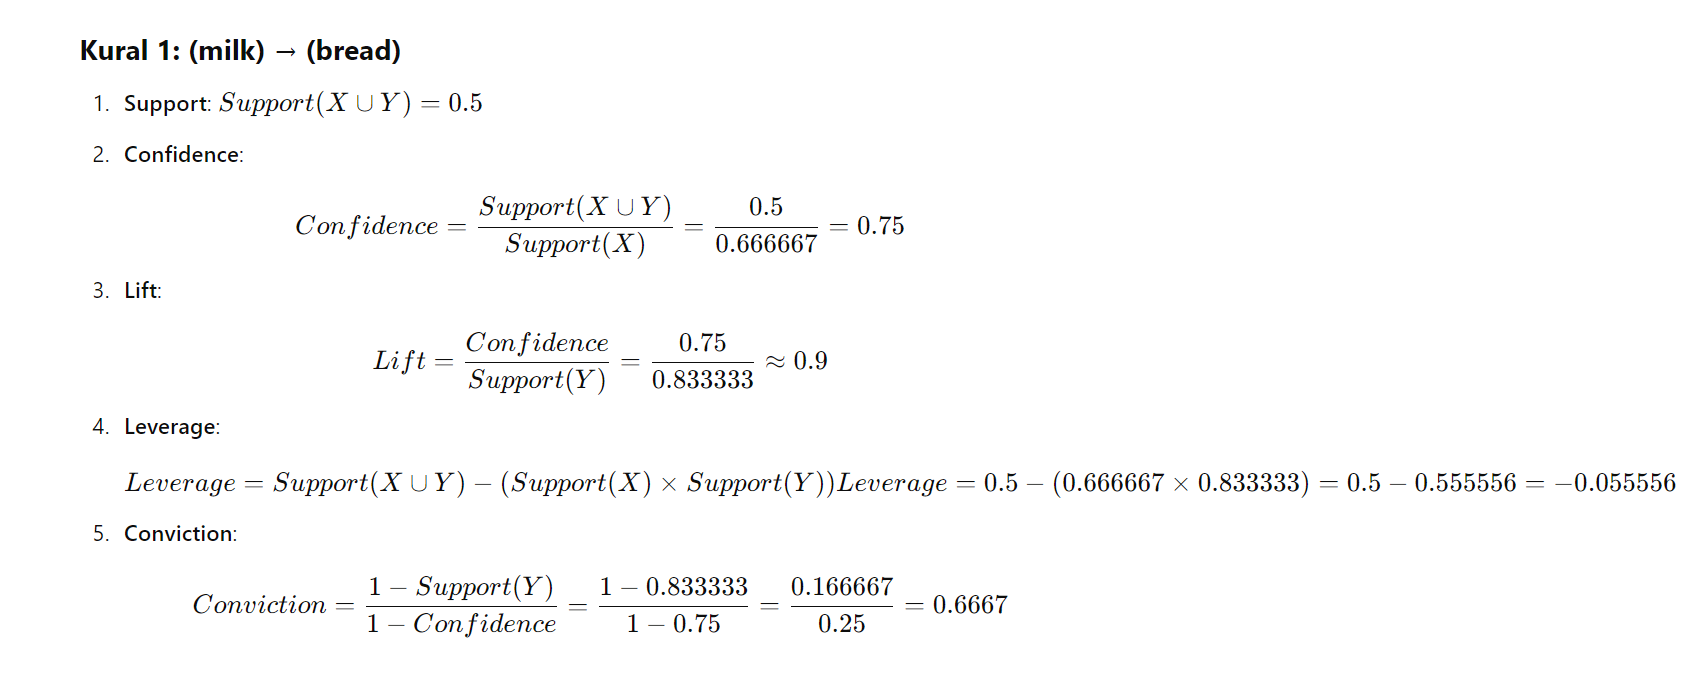

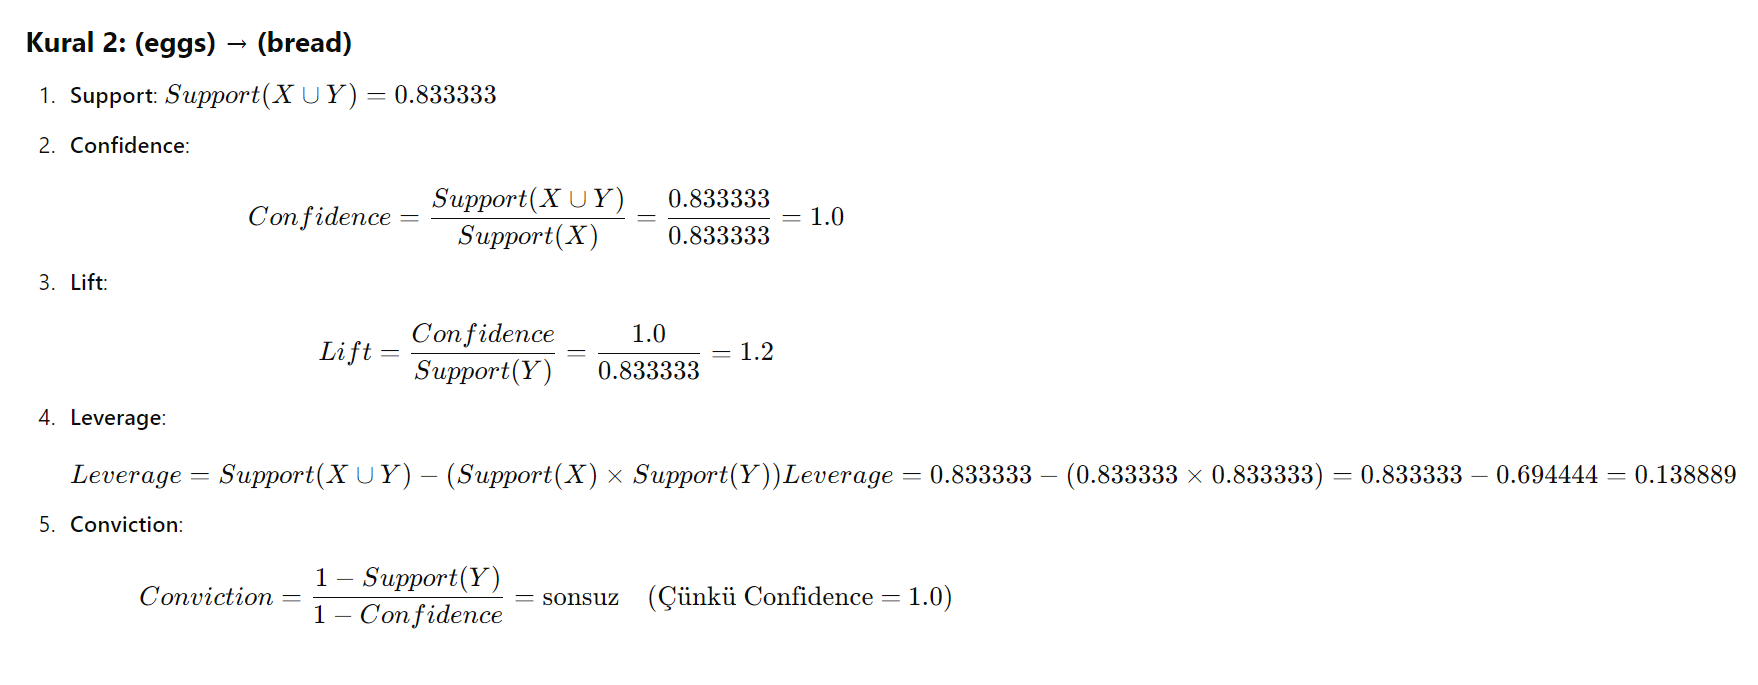

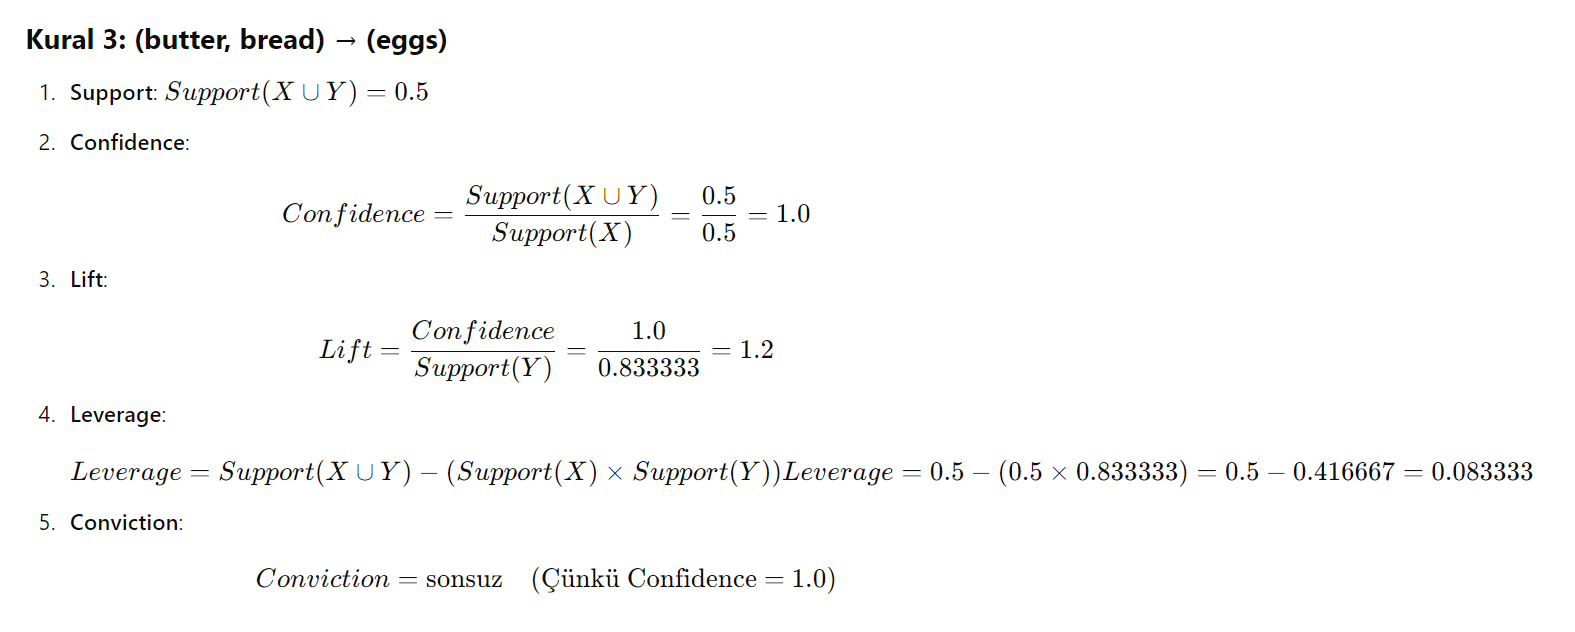

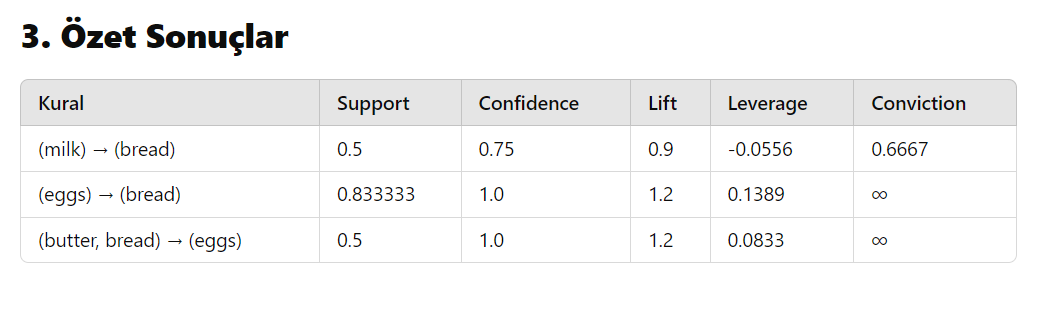

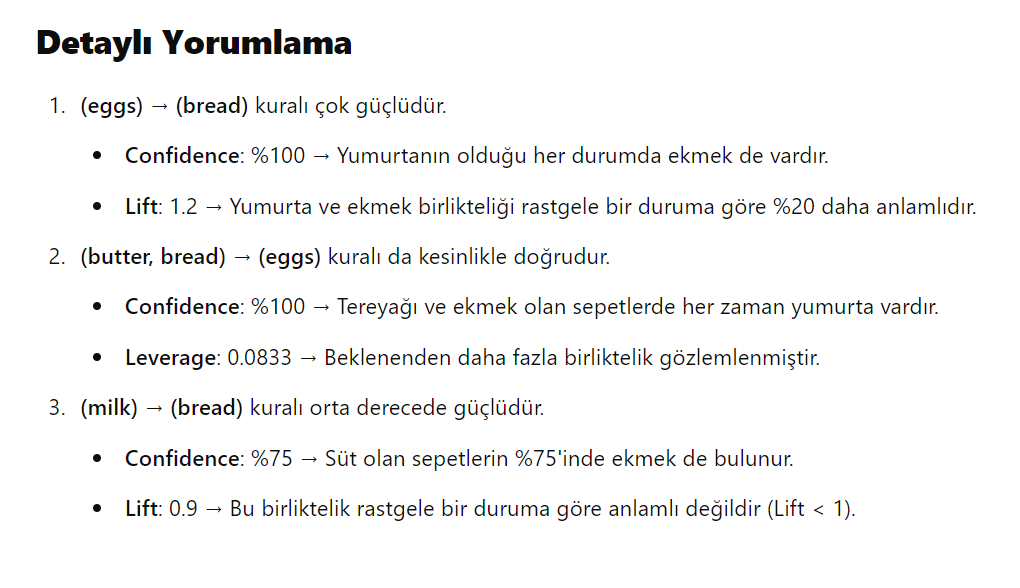

# **Apriori Verisetinde Uygulanması**

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Veri Ön İşleme**

In [16]:
## Tek bir işlemde maksimum ürün değerini tahsis etmek için gerekli sayıda sütun oluşturma
# Veri hatlarını döngüye al
with open("/content/drive/MyDrive/Priori_Algoritması/groceries.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

## Boş bellek alanı
del temp_f

#Sütun adlarını oluşturun (adlar 0, 1, 2, ..., maksimum sütun sayısı - 1 olacak)
column_names = [i for i in range(0, max(col_count))]

# CSV'yi oku
dataset = pd.read_csv("/content/drive/MyDrive/Priori_Algoritması/groceries.csv", header=None, delimiter=",", names=column_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
## Veri setini listelerin listesine dönüştürme
transactions = dataset.values.astype(str).tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
## 'nan' değerleri siliniyor
transactions = [[item for item in row if item != 'nan'] for row in transactions]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# ###İlk 5 liste kontrol ediliyor
transactions[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

# Her işlemin içeriğinin kodlanması

In [20]:
# Each column = 1 product
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# İlk 5 satırı kontrol ediyorum
df.head(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
# İşlem Sayısı x Tek bir işlemde satın alınan maksimum ürün sayısı
df.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9835, 169)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: bool(169)
memory usage: 1.6 MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# yinelenen değerleri kontrol etme
df.duplicated().value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
False,7011
True,2824


In [25]:
# yinelenen değerlerin düşürülmesi
df.drop_duplicates(inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Apriori model**

In [26]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Destek >= 0,01 olan kombinasyon sayısı (1 veya daha fazla ürün)
frequent_itemsets.count()['itemsets']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


560

**Sonuçların görselleştirilmesi**

In [28]:
##Sepetteki sık ürünler
frequent_itemsets.nlargest(n = 15, columns = 'support')
# Destek, bir olayın gerçekleşmesinin basit temel olasılığıdır.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
99,0.316931,(whole milk)
63,0.251890,(other vegetables)
76,0.211525,(rolls/buns)
85,0.195692,(soda)
100,0.180288,(yogurt)
77,0.146627,(root vegetables)
93,0.139352,(tropical fruit)
7,0.134646,(bottled water)
83,0.127086,(shopping bags)
80,0.121095,(sausage)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='itemsets', ylabel='support'>

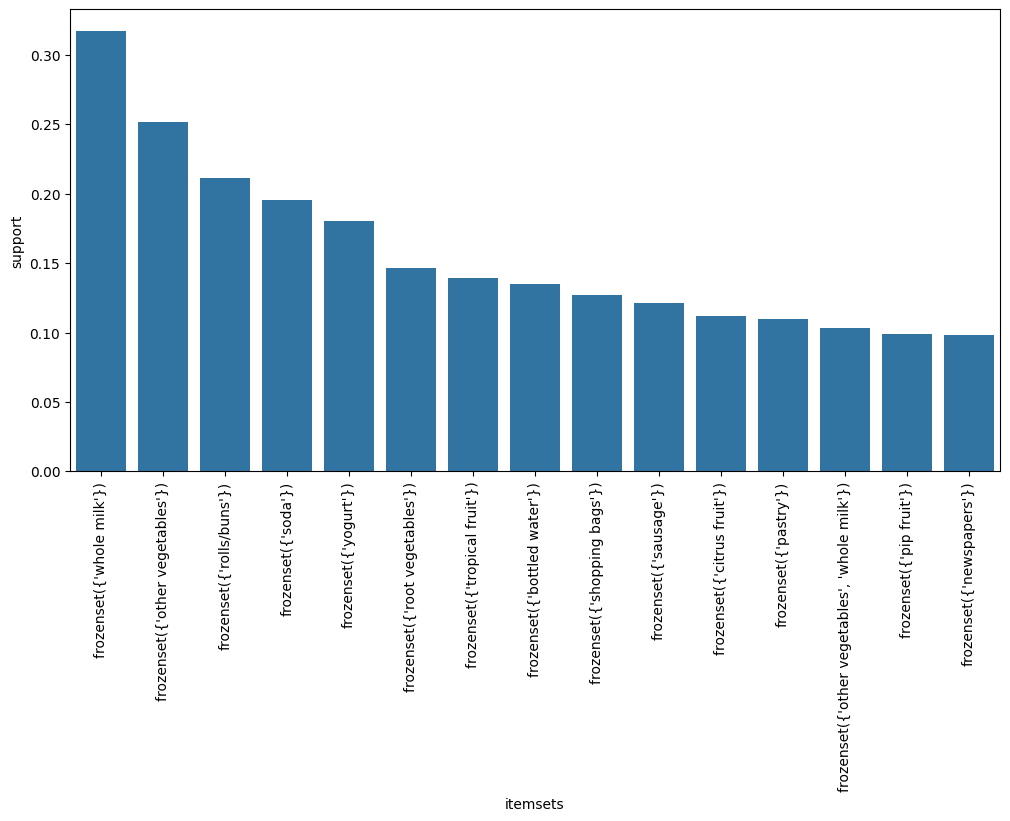

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='itemsets', y='support', data=frequent_itemsets.nlargest(n = 15, columns = 'support'))

In [35]:
# Birliktelik kuralları çıkarma
rules = association_rules(frequent_itemsets,
                          metric="lift",
                          min_threshold=1,
                          num_itemsets=len(frequent_itemsets))

# Sonuçları destek (support) değerine göre sıralama
rules = rules.sort_values(by=['support'], ascending=False)

# Sonuçları gösterme
print(rules)

# Lift, bir öğenin diğer bir öğe satın alındığında satın alınma olasılığını ölçerken, her iki öğenin de ne kadar popüler olduğunu kontrol eder.
# 1'lik bir kaldırma, her iki öğenin de aslında bağımsız ve herhangi bir ilişkiye sahip olmadığı anlamına gelir
# 1'den büyük herhangi bir değer için lift gerçekten bir ilişkinin var olduğunu gösterir.
# Değer ne kadar yüksek olursa ilişki de o kadar yüksek olur.

rules.sort_values(by=['support'], ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                      antecedents                   consequents  \
493                  (whole milk)            (other vegetables)   
492            (other vegetables)                  (whole milk)   
630                      (yogurt)                  (whole milk)   
631                  (whole milk)                      (yogurt)   
553                  (whole milk)                  (rolls/buns)   
...                           ...                           ...   
976               (sausage, soda)            (other vegetables)   
977   (sausage, other vegetables)                        (soda)   
165          (whipped/sour cream)                     (chicken)   
1179                    (sausage)  (tropical fruit, whole milk)   
1003             (tropical fruit)      (soda, other vegetables)   

      antecedent support  consequent support   support  confidence      lift  \
493             0.316931            0.251890  0.103552    0.326733  1.297125   
492             0.251890           

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
493,(whole milk),(other vegetables),0.316931,0.251890,0.103552,0.326733,1.297125,1.0,0.023720,1.111164,0.335346,0.222563,0.100042,0.368916
492,(other vegetables),(whole milk),0.251890,0.316931,0.103552,0.411099,1.297125,1.0,0.023720,1.159904,0.306191,0.222563,0.137860,0.368916
630,(yogurt),(whole milk),0.180288,0.316931,0.076879,0.426424,1.345481,1.0,0.019740,1.190896,0.313246,0.182898,0.160296,0.334499
631,(whole milk),(yogurt),0.316931,0.180288,0.076879,0.242574,1.345481,1.0,0.019740,1.082234,0.375908,0.182898,0.075985,0.334499
553,(whole milk),(rolls/buns),0.316931,0.211525,0.075881,0.239424,1.131896,1.0,0.008842,1.036682,0.170592,0.167665,0.035384,0.299078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,(chicken),(whipped/sour cream),0.056625,0.094138,0.010127,0.178841,1.899782,1.0,0.004796,1.103151,0.502053,0.072008,0.093506,0.143209
979,(sausage),"(soda, other vegetables)",0.121095,0.045500,0.010127,0.083628,1.837976,1.0,0.004617,1.041607,0.518740,0.064722,0.039945,0.153099
978,"(soda, other vegetables)",(sausage),0.045500,0.121095,0.010127,0.222571,1.837976,1.0,0.004617,1.130526,0.477657,0.064722,0.115456,0.153099
1180,(tropical fruit),"(sausage, whole milk)",0.139352,0.041078,0.010127,0.072671,1.769095,1.0,0.004403,1.034069,0.505131,0.059464,0.032947,0.159600


In [37]:
## Yeni ilişki sütunları oluşturma - en az 2 öncül veya sonuç
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
493,(whole milk),(other vegetables),0.316931,0.251890,0.103552,0.326733,1.297125,1.0,0.023720,1.111164,0.335346,0.222563,0.100042,0.368916,1,1
492,(other vegetables),(whole milk),0.251890,0.316931,0.103552,0.411099,1.297125,1.0,0.023720,1.159904,0.306191,0.222563,0.137860,0.368916,1,1
630,(yogurt),(whole milk),0.180288,0.316931,0.076879,0.426424,1.345481,1.0,0.019740,1.190896,0.313246,0.182898,0.160296,0.334499,1,1
631,(whole milk),(yogurt),0.316931,0.180288,0.076879,0.242574,1.345481,1.0,0.019740,1.082234,0.375908,0.182898,0.075985,0.334499,1,1
553,(whole milk),(rolls/buns),0.316931,0.211525,0.075881,0.239424,1.131896,1.0,0.008842,1.036682,0.170592,0.167665,0.035384,0.299078,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,"(sausage, soda)",(other vegetables),0.032092,0.251890,0.010127,0.315556,1.252752,1.0,0.002043,1.093018,0.208447,0.036979,0.085102,0.177880,2,1
977,"(sausage, other vegetables)",(soda),0.037227,0.195692,0.010127,0.272031,1.390092,1.0,0.002842,1.104865,0.291474,0.045455,0.094912,0.161890,2,1
165,(whipped/sour cream),(chicken),0.094138,0.056625,0.010127,0.107576,1.899782,1.0,0.004796,1.057092,0.522843,0.072008,0.054009,0.143209,1,1
1179,(sausage),"(tropical fruit, whole milk)",0.121095,0.058052,0.010127,0.083628,1.440576,1.0,0.003097,1.027910,0.347971,0.059916,0.027152,0.129037,1,2


In [38]:
##İnsanların 2 kişiyi satın aldıktan sonra satın aldıkları ürünleri kontrol etme
rules[rules['antecedent_len'] >= 2]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
966,"(other vegetables, whole milk)",(root vegetables),0.103552,0.146627,0.032520,0.314050,2.141830,1.0,0.017337,1.244074,0.594691,0.149410,0.196189,0.267920,2,1
965,"(root vegetables, whole milk)",(other vegetables),0.068179,0.251890,0.032520,0.476987,1.893635,1.0,0.015347,1.430387,0.506444,0.113095,0.300888,0.303046,2,1
964,"(root vegetables, other vegetables)",(whole milk),0.065469,0.316931,0.032520,0.496732,1.567321,1.0,0.011771,1.357268,0.387326,0.092947,0.263226,0.299671,2,1
1044,"(yogurt, other vegetables)",(whole milk),0.059763,0.316931,0.031094,0.520286,1.641642,1.0,0.012153,1.423911,0.415697,0.089971,0.297709,0.309198,2,1
1045,"(yogurt, whole milk)",(other vegetables),0.076879,0.251890,0.031094,0.404453,1.605673,1.0,0.011729,1.256172,0.408623,0.104456,0.203931,0.263948,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,"(sausage, whole milk)",(tropical fruit),0.041078,0.139352,0.010127,0.246528,1.769095,1.0,0.004403,1.142242,0.453363,0.059464,0.124529,0.159600,2,1
1176,"(sausage, tropical fruit)",(whole milk),0.019541,0.316931,0.010127,0.518248,1.635211,1.0,0.003934,1.417887,0.396200,0.031031,0.294725,0.275101,2,1
764,"(citrus fruit, whole milk)",(rolls/buns),0.042505,0.211525,0.010127,0.238255,1.126370,1.0,0.001136,1.035091,0.117172,0.041520,0.033901,0.143065,2,1
976,"(sausage, soda)",(other vegetables),0.032092,0.251890,0.010127,0.315556,1.252752,1.0,0.002043,1.093018,0.208447,0.036979,0.085102,0.177880,2,1


In [39]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.3) &
       (rules['lift'] > 1) ].sort_values(by=['lift', 'support'], ascending=False)
       ### Güven, olay B'nin zaten gerçekleşmiş olması koşuluyla olay A'nın gerçekleşme olasılığıdır.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
1218,"(root vegetables, yogurt)","(other vegetables, whole milk)",0.036086,0.103552,0.010983,0.304348,2.939095,1.0,0.007246,1.288645,0.684459,0.085366,0.223991,0.205204,2,2
634,"(other vegetables, beef)",(root vegetables),0.027386,0.146627,0.011125,0.406250,2.770641,1.0,0.007110,1.437260,0.657067,0.068301,0.304232,0.241063,2,1
888,"(other vegetables, pip fruit)",(tropical fruit),0.036371,0.139352,0.013122,0.360784,2.589006,1.0,0.008054,1.346412,0.636917,0.080702,0.257285,0.227475,2,1
646,"(beef, whole milk)",(root vegetables),0.029810,0.146627,0.011268,0.377990,2.577909,1.0,0.006897,1.371962,0.630896,0.068221,0.271117,0.227419,2,1
1231,"(other vegetables, tropical fruit, whole milk)",(yogurt),0.023962,0.180288,0.010697,0.446429,2.476195,1.0,0.006377,1.480770,0.610791,0.055269,0.324676,0.252882,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,"(sausage, other vegetables)",(whole milk),0.037227,0.316931,0.014263,0.383142,1.208914,1.0,0.002465,1.107336,0.179493,0.041964,0.096932,0.214073,2,1
1188,"(soda, tropical fruit)",(whole milk),0.029097,0.316931,0.010983,0.377451,1.190958,1.0,0.001761,1.097214,0.165145,0.032780,0.088601,0.206052,2,1
674,"(rolls/buns, bottled water)",(whole milk),0.032520,0.316931,0.012124,0.372807,1.176305,1.0,0.001817,1.089090,0.154918,0.035941,0.081802,0.205530,2,1
1104,"(rolls/buns, sausage)",(whole milk),0.038226,0.316931,0.012694,0.332090,1.047831,1.0,0.000579,1.022696,0.047462,0.037068,0.022192,0.186072,2,1


In [40]:
##İnsanların bir tane daha satın aldıktan sonra satın aldıkları ortak 2 ürünü kontrol etmek
rules[rules['consequent_len'] >= 2]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
969,(whole milk),"(root vegetables, other vegetables)",0.316931,0.065469,0.032520,0.102610,1.567321,1.0,0.011771,1.041389,0.529915,0.092947,0.039744,0.299671,1,2
968,(other vegetables),"(root vegetables, whole milk)",0.251890,0.068179,0.032520,0.129105,1.893635,1.0,0.015347,1.069959,0.630810,0.113095,0.065385,0.303046,1,2
967,(root vegetables),"(other vegetables, whole milk)",0.146627,0.103552,0.032520,0.221790,2.141830,1.0,0.017337,1.151936,0.624709,0.149410,0.131896,0.267920,1,2
1047,(yogurt),"(other vegetables, whole milk)",0.180288,0.103552,0.031094,0.172468,1.665531,1.0,0.012425,1.083280,0.487477,0.123025,0.076878,0.236372,1,2
1049,(whole milk),"(yogurt, other vegetables)",0.316931,0.059763,0.031094,0.098110,1.641642,1.0,0.012153,1.042518,0.572202,0.089971,0.040784,0.309198,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,(other vegetables),"(soda, tropical fruit)",0.251890,0.029097,0.010127,0.040204,1.381712,1.0,0.002798,1.011572,0.369277,0.037388,0.011440,0.194122,1,2
766,(citrus fruit),"(rolls/buns, whole milk)",0.111539,0.075881,0.010127,0.090793,1.196520,1.0,0.001663,1.016401,0.184862,0.057120,0.016137,0.112126,1,2
765,(rolls/buns),"(citrus fruit, whole milk)",0.211525,0.042505,0.010127,0.047876,1.126370,1.0,0.001136,1.005641,0.142290,0.041520,0.005610,0.143065,1,2
1179,(sausage),"(tropical fruit, whole milk)",0.121095,0.058052,0.010127,0.083628,1.440576,1.0,0.003097,1.027910,0.347971,0.059916,0.027152,0.129037,1,2


In [41]:
rules[ (rules['consequent_len'] >= 2) &
       (rules['lift'] > 1) ].sort_values(by=['lift', 'confidence'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
1237,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.058052,0.059763,0.010697,0.184275,3.083421,1.0,7.228122e-03,1.152640,0.717327,0.099867,0.132426,0.181636,2,2
1232,"(yogurt, other vegetables)","(tropical fruit, whole milk)",0.059763,0.058052,0.010697,0.178998,3.083421,1.0,7.228122e-03,1.147315,0.718633,0.099867,0.128400,0.181636,2,2
1218,"(root vegetables, yogurt)","(other vegetables, whole milk)",0.036086,0.103552,0.010983,0.304348,2.939095,1.0,7.245964e-03,1.288645,0.684459,0.085366,0.223991,0.205204,2,2
1223,"(other vegetables, whole milk)","(root vegetables, yogurt)",0.103552,0.036086,0.010983,0.106061,2.939095,1.0,7.245964e-03,1.078277,0.735970,0.085366,0.072594,0.205204,2,2
1234,"(yogurt, whole milk)","(other vegetables, tropical fruit)",0.076879,0.049494,0.010697,0.139147,2.811402,1.0,6.892443e-03,1.104144,0.697965,0.092478,0.094321,0.177642,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,(rolls/buns),"(other vegetables, tropical fruit)",0.211525,0.049494,0.010983,0.051922,1.049059,1.0,5.136090e-04,1.002561,0.059311,0.043925,0.002555,0.136912,1,2
1109,(whole milk),"(rolls/buns, sausage)",0.316931,0.038226,0.012694,0.040054,1.047831,1.0,5.794631e-04,1.001905,0.066827,0.037068,0.001901,0.186072,1,2
1001,(soda),"(other vegetables, tropical fruit)",0.195692,0.049494,0.010127,0.051749,1.045574,1.0,4.414075e-04,1.002379,0.054193,0.043083,0.002373,0.128180,1,2
997,(whole milk),"(other vegetables, shopping bags)",0.316931,0.032520,0.010697,0.033753,1.037916,1.0,3.907912e-04,1.001276,0.053481,0.031579,0.001274,0.181350,1,2


# **Çözüm**

-Tam Yağlı Süt, sepetteki en yaygın üründür

-Meyve ve Sebze satın alan birinin Kök de satın alma olasılığı yüksektir

-Lor satın alan biri muhtemelen Tam Yağlı Süt ve Yoğurt da satın alacaktır

-Birisi Kök satın aldığında sahip olduğumuz beklentiyle aynı - muhtemelen Narenciye ve Sebze de satın alacaktır



# **Veriseti Hakkında **

Groceries Market Basket Dataset

-Veri kümesi 9835 işlem ve 169 benzersiz öğe içeriyor

-Burada bulunabilen Bakkal Pazarı Sepeti Veri Seti. Veri seti, bakkal alışverişi yapan müşteriler tarafından gerçekleştirilen 9835 işlemi içerir. Veriler 169 benzersiz öğe içerir.

-Veriler, çok değişkenli pazar sepeti analizleri için veri madenciliği yapmaya uygundur.

--https://github.com/shubhamjha97/association-rule-mining-apriori

--Veriler Apriori algoritması kullanılarak Dernek Kuralları madenciliği altında inceleniyor.

-CS F415- Veri Madenciliği Ders Ödevi @ BITS Pilani, Haydarabad Kampüsü.

-BITS Pilani, Haydarabad Kampüsü'nden Yardımcı Doçent Dr. Aruna Malapati'nin rehberliğinde yapılmıştır.


-Ön işleme

-Csv dosyası işlem bazında okundu ve her işlem liste halinde kaydedildi. Her bir öğenin benzersiz bir tam sayıya karşılık gelmesi için veri kümesindeki benzersiz öğelerden tam sayılara bir eşleme oluşturuldu. Depolama ve hesaplama gereksinimini azaltmak için tüm veriler tamsayılarla eşlendi. Tamsayılardan öğeye ters bir eşleme oluşturuldu, böylece öğe adları nihai çıktı dosyasına yazılabilir.

